<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/lasso_l1%EA%B7%9C%EC%A0%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

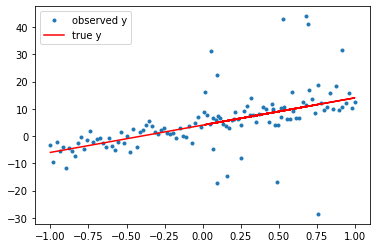

In [2]:
# Create dummy data for lasso regression
# Dummy Data used for linear regression
a = 10
b = 4
n = 100
sigma = 3
e1 = sigma * np.random.randn(n) 
x1 = np.linspace(-1, 1, num=n)
y1 = a * x1 + b + e1

# Create outliers to see the robustness of lasso regression
n2 = 20
e2 = sigma * 10 * np.random.randn(n2) 
x2 = np.random.random_sample(size=n2)
y2 = a * x2 + b + e2

# Add two data
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
plt.plot(x, y, '.', label='observed y');
plt.plot(x, a * x + b, 'r', label='true y');
plt.legend();

In [3]:
#Fitting
#Now we can see how the coefficient A and the intercept b are close to the ones I used to create this dataset.

reg = Lasso(alpha=0.1)
reg.fit(x.reshape(-1, 1), y)  
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
print(f'Coefficients A: {reg.coef_[0]:.3}, Intercept b: {reg.intercept_:.2}')

Coefficients A: 10.2, Intercept b: 4.5


In [4]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1, 1), y);
print(f'Coefficients A: {lin_reg.coef_[0]:.3}, Intercept b: {lin_reg.intercept_:.2}')

Coefficients A: 10.5, Intercept b: 4.5


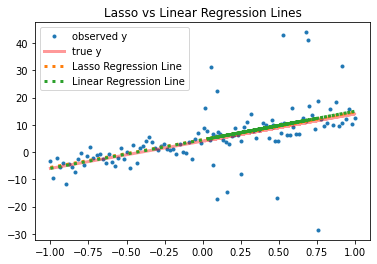

In [5]:
#Comparison between Lasso and Linear Regression
plt.plot(x, y, '.', label='observed y');
plt.plot(x, a * x + b, 'r', label='true y', lw=3, alpha=0.4);
plt.plot(x, reg.coef_[0] * x + reg.intercept_ , label='Lasso Regression Line', c='C1', ls='dotted', lw=3)
plt.plot(x, lin_reg.coef_[0] * x + lin_reg.intercept_ , label='Linear Regression Line', c='C2', ls='dotted', lw=3)
plt.legend();
plt.title('Lasso vs Linear Regression Lines');